# 確率ロボティクス2016第4回

上田隆一

2016年10月4日@千葉工業大学

## 今日やること

モンテカルロ近似された$bel$にセンサ情報を反映

* 考え方
  * センサの値とパーティクルの姿勢を比較
    * センサの値が得られそうな姿勢のパーティクルは真の姿勢の有力な候補
    * センサの値が得られそうな姿勢のパーティクルはそうでもない
  * 前回使わなかった重みを使用
  
## ランドマークの準備

現在主流はレーザレンジファインダーを使う方法ですが、シミュレーションが大変なので点ランドマークで。

* 点ランドマーク
  * 環境中での絶対位置が分かっている目印
  * ロボットから観測すると、次のことが（曖昧さと共に）分かる
    * どっちの方角に見えるか
    * 距離はどれくらいか

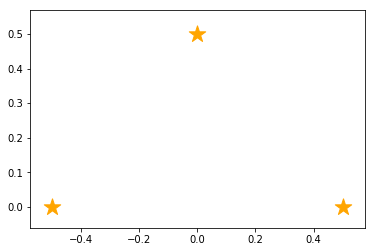

In [1]:
%matplotlib inline
import numpy as np
from copy import copy
import math, random
import matplotlib.pyplot as plt                   #   for plotting data
from matplotlib.patches import Ellipse      #  for drawing

class Landmarks:
    def __init__(self,array):
        self.positions = array
    
    def draw(self):
        xs = [ e[0] for e in self.positions]
        ys = [ e[1] for e in self.positions]
        plt.scatter(xs,ys,s=300,marker="*",label="landmarks",color="orange")
        
actual_landmarks = Landmarks(np.array([[-0.5,0.0],[0.5,0.0],[0.0,0.5]]))
actual_landmarks.draw()

## 観測モデルの作成

ロボットからどの向き、距離に見えるか計算してみましょう。